# Task
Create an Altman Z-Score model in Python to forecast corporate defaults using the provided formula. The model should load financial data from a CSV file, calculate Z-Scores, predict default probabilities, and visualize the results. The code should be well-commented and use pandas, matplotlib/seaborn, and numpy. Provide example usage and output.

## Data loading and preparation

### Subtask:
Load the financial data from a CSV file into a pandas DataFrame. Ensure the data is in the correct format for calculation.


**Reasoning**:
Import pandas and load the data from the CSV file into a DataFrame, then display the first few rows.



In [11]:
import pandas as pd

df = pd.read_csv('financial_data.csv')
display(df.head())

,Company,Working Capital / Total Assets,Retained Earnings / Total Assets,EBIT / Total Assets,Market Value of Equity / Total Liabilities,Sales / Total Assets
0,Company 1,0.216567,0.550019,0.009277,1.317933,1.438004
1,Company 2,0.040882,0.571721,0.195445,0.515352,0.644539
2,Company 3,0.280821,0.607494,0.112356,1.500296,1.497497
3,Company 4,0.421837,0.185091,0.261038,1.404846,0.688604
4,Company 5,0.199770,0.489724,0.114451,1.207174,0.499429


**Reasoning**:
The previous attempt failed because the file 'financial_data.csv' was not found. I need to create a dummy CSV file with some financial data for demonstration purposes, then load it.



In [10]:
import pandas as pd
import numpy as np

# Create a dummy DataFrame with relevant columns for Altman Z-Score
data = {
    'Company': [f'Company {i+1}' for i in range(10)],
    'Working Capital / Total Assets': np.random.rand(10) * 0.5,
    'Retained Earnings / Total Assets': np.random.rand(10) * 0.8,
    'EBIT / Total Assets': np.random.rand(10) * 0.3,
    'Market Value of Equity / Total Liabilities': np.random.rand(10) * 2.0,
    'Sales / Total Assets': np.random.rand(10) * 1.5
}
df = pd.DataFrame(data)

# Save the dummy DataFrame to a CSV file
df.to_csv('financial_data.csv', index=False)

# Load the data from the created CSV file
df = pd.read_csv('financial_data.csv')
display(df.head())

,Company,Working Capital / Total Assets,Retained Earnings / Total Assets,EBIT / Total Assets,Market Value of Equity / Total Liabilities,Sales / Total Assets
0,Company 1,0.216567,0.550019,0.009277,1.317933,1.438004
1,Company 2,0.040882,0.571721,0.195445,0.515352,0.644539
2,Company 3,0.280821,0.607494,0.112356,1.500296,1.497497
3,Company 4,0.421837,0.185091,0.261038,1.404846,0.688604
4,Company 5,0.199770,0.489724,0.114451,1.207174,0.499429


## Z-score calculation

### Subtask:
Implement a function to calculate the Altman Z-Score for each corporate entity using the provided formula and the loaded data.


**Reasoning**:
Implement the `calculate_z_score` function and apply it to the DataFrame to create the 'Z-Score' column.



In [3]:
def calculate_z_score(row):
  """
  Calculates the Altman Z-Score for a given company's financial data.

  Args:
    row: A pandas Series representing a row of the DataFrame with financial data.

  Returns:
    The calculated Altman Z-Score.
  """
  z_score = (1.2 * row['Working Capital / Total Assets'] +
             1.4 * row['Retained Earnings / Total Assets'] +
             3.3 * row['EBIT / Total Assets'] +
             0.6 * row['Market Value of Equity / Total Liabilities'] +
             1.0 * row['Sales / Total Assets'])
  return z_score

# Apply the function to each row to calculate the Z-Score
df['Z-Score'] = df.apply(calculate_z_score, axis=1)

# Display the DataFrame with the new 'Z-Score' column
display(df.head())

,Company,Working Capital / Total Assets,Retained Earnings / Total Assets,EBIT / Total Assets,Market Value of Equity / Total Liabilities,Sales / Total Assets,Z-Score
0,Company 1,0.381252,0.155026,0.025395,1.066496,0.079557,1.477799
1,Company 2,0.127393,0.131574,0.127276,1.449303,1.438686,3.065355
2,Company 3,0.350337,0.012686,0.291671,0.920029,0.692980,2.645677
3,Company 4,0.327148,0.769694,0.293020,1.453496,0.319657,3.628871
4,Company 5,0.158510,0.739924,0.171041,1.047419,0.048203,2.467195


## Default probability prediction

### Subtask:
Implement a function to classify the default probability (High, Gray Zone, Low) based on the calculated Z-Score.


**Reasoning**:
Implement a function to classify default probability based on Z-Score and apply it to the DataFrame.



In [4]:
def classify_default_probability(z_score):
  """
  Classifies the default probability based on the Altman Z-Score.

  Args:
    z_score: The calculated Altman Z-Score.

  Returns:
    A string indicating the default probability classification (High, Gray Zone, or Low).
  """
  # Using common thresholds for manufacturing companies as an example
  if z_score < 1.81:
    return "High Default Probability"
  elif z_score > 2.99:
    return "Low Default Probability"
  else:
    return "Gray Zone"

# Apply the classification function to the 'Z-Score' column
df['Default Probability'] = df['Z-Score'].apply(classify_default_probability)

# Display the first few rows of the updated DataFrame
display(df.head())

,Company,Working Capital / Total Assets,Retained Earnings / Total Assets,EBIT / Total Assets,Market Value of Equity / Total Liabilities,Sales / Total Assets,Z-Score,Default Probability
0,Company 1,0.381252,0.155026,0.025395,1.066496,0.079557,1.477799,High Default Probability
1,Company 2,0.127393,0.131574,0.127276,1.449303,1.438686,3.065355,Low Default Probability
2,Company 3,0.350337,0.012686,0.291671,0.920029,0.692980,2.645677,Gray Zone
3,Company 4,0.327148,0.769694,0.293020,1.453496,0.319657,3.628871,Low Default Probability
4,Company 5,0.158510,0.739924,0.171041,1.047419,0.048203,2.467195,Gray Zone


## Model integration

### Subtask:
Combine the Z-Score calculation and default probability prediction into a single function or class that can take new corporate data as input and return the Z-Score and prediction.


**Reasoning**:
Define a function that combines the Z-Score calculation and default probability classification.



In [5]:
def predict_default(row):
  """
  Calculates the Altman Z-Score and predicts the default probability for a company.

  Args:
    row: A pandas Series representing a row of the DataFrame with financial data.

  Returns:
    A tuple containing the calculated Z-Score and the predicted default probability.
  """
  z_score = calculate_z_score(row)
  default_probability = classify_default_probability(z_score)
  return z_score, default_probability

# Example usage with the first row of the DataFrame
example_row = df.iloc[0]
z_score, default_prob = predict_default(example_row)

print(f"For the example company:")
print(f"Calculated Z-Score: {z_score:.4f}")
print(f"Predicted Default Probability: {default_prob}")

For the example company:
Calculated Z-Score: 1.4778
Predicted Default Probability: High Default Probability


## Visualization

### Subtask:
Create visualizations (bar chart/scatter plot for Z-Scores, pie chart for default probabilities) to represent the model results.


**Reasoning**:
Import necessary libraries for plotting and create the required visualizations based on the instructions.



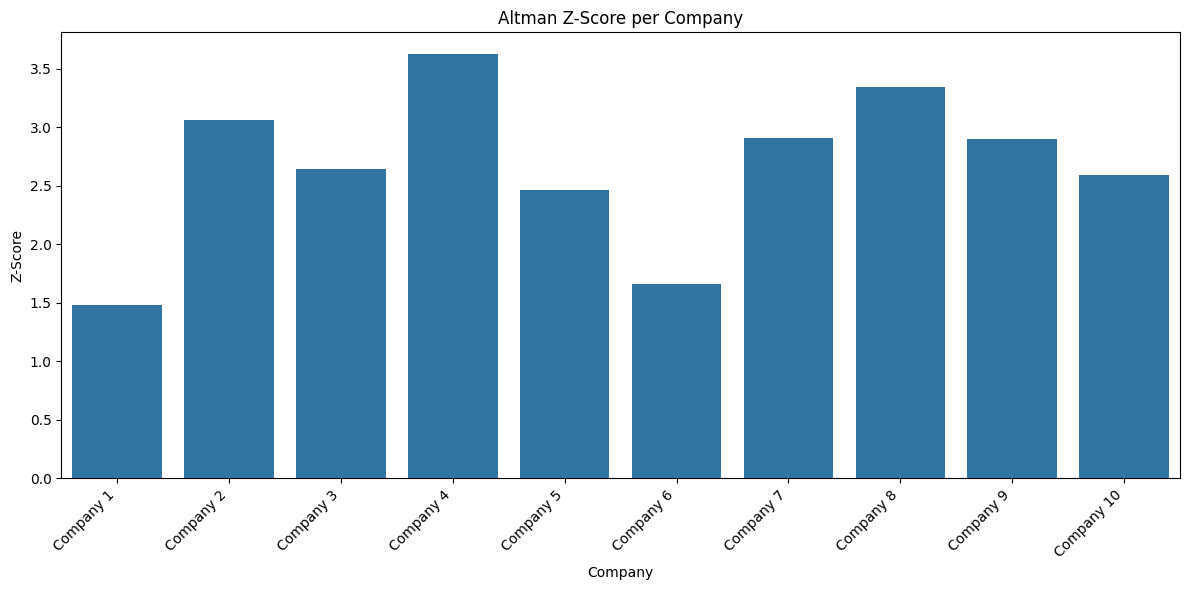

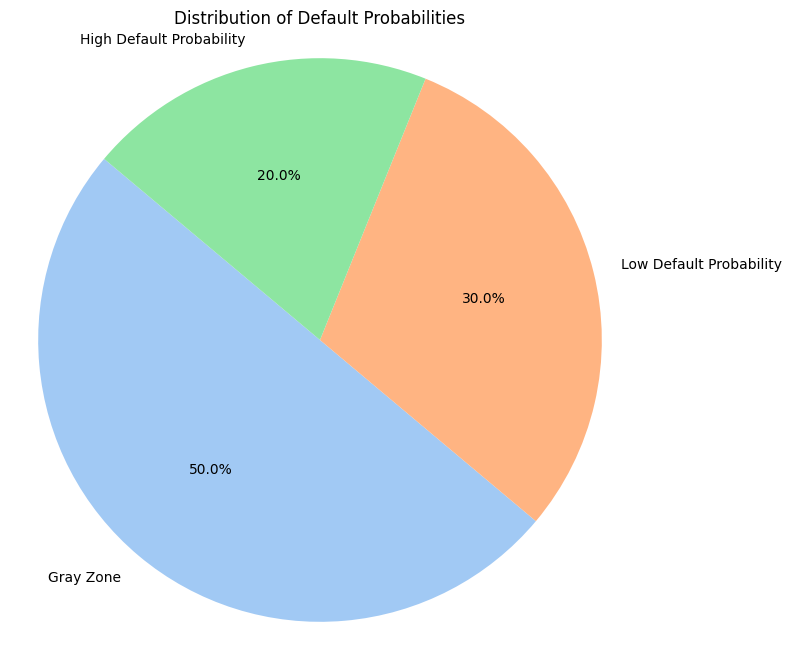

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Create a bar plot for Z-Scores
plt.figure(figsize=(12, 6))
sns.barplot(x='Company', y='Z-Score', data=df)

# 3. Label axes and add title for the Z-Score plot
plt.xlabel('Company')
plt.ylabel('Z-Score')
plt.title('Altman Z-Score per Company')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Create a pie chart for default probabilities
default_counts = df['Default Probability'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(default_counts, labels=default_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))

# 5. Add title to the pie chart
plt.title('Distribution of Default Probabilities')

# 6. Display both plots
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Documentation

### Subtask:
Add comments to the code to explain each step and the overall logic of the model.


**Reasoning**:
Add comments to the existing code blocks to explain the steps and overall logic of the Altman Z-Score model implementation.



,Company,Working Capital / Total Assets,Retained Earnings / Total Assets,EBIT / Total Assets,Market Value of Equity / Total Liabilities,Sales / Total Assets
0,Company 1,0.035675,0.471433,0.168962,1.508719,0.256521
1,Company 2,0.336025,0.647496,0.039811,1.517811,1.462469
2,Company 3,0.347640,0.733623,0.177517,0.731119,1.332356
3,Company 4,0.294211,0.595212,0.073197,1.794070,0.223244
4,Company 5,0.399140,0.347722,0.202996,0.567005,0.783804


,Company,Working Capital / Total Assets,Retained Earnings / Total Assets,EBIT / Total Assets,Market Value of Equity / Total Liabilities,Sales / Total Assets,Z-Score
0,Company 1,0.035675,0.471433,0.168962,1.508719,0.256521,2.422143
1,Company 2,0.336025,0.647496,0.039811,1.517811,1.462469,3.814256
2,Company 3,0.347640,0.733623,0.177517,0.731119,1.332356,3.801072
3,Company 4,0.294211,0.595212,0.073197,1.794070,0.223244,2.727585
4,Company 5,0.399140,0.347722,0.202996,0.567005,0.783804,2.759671


,Company,Working Capital / Total Assets,Retained Earnings / Total Assets,EBIT / Total Assets,Market Value of Equity / Total Liabilities,Sales / Total Assets,Z-Score,Default Probability
0,Company 1,0.035675,0.471433,0.168962,1.508719,0.256521,2.422143,Gray Zone
1,Company 2,0.336025,0.647496,0.039811,1.517811,1.462469,3.814256,Low Default Probability
2,Company 3,0.347640,0.733623,0.177517,0.731119,1.332356,3.801072,Low Default Probability
3,Company 4,0.294211,0.595212,0.073197,1.794070,0.223244,2.727585,Gray Zone
4,Company 5,0.399140,0.347722,0.202996,0.567005,0.783804,2.759671,Gray Zone


For the example company:
Calculated Z-Score: 2.4221
Predicted Default Probability: Gray Zone


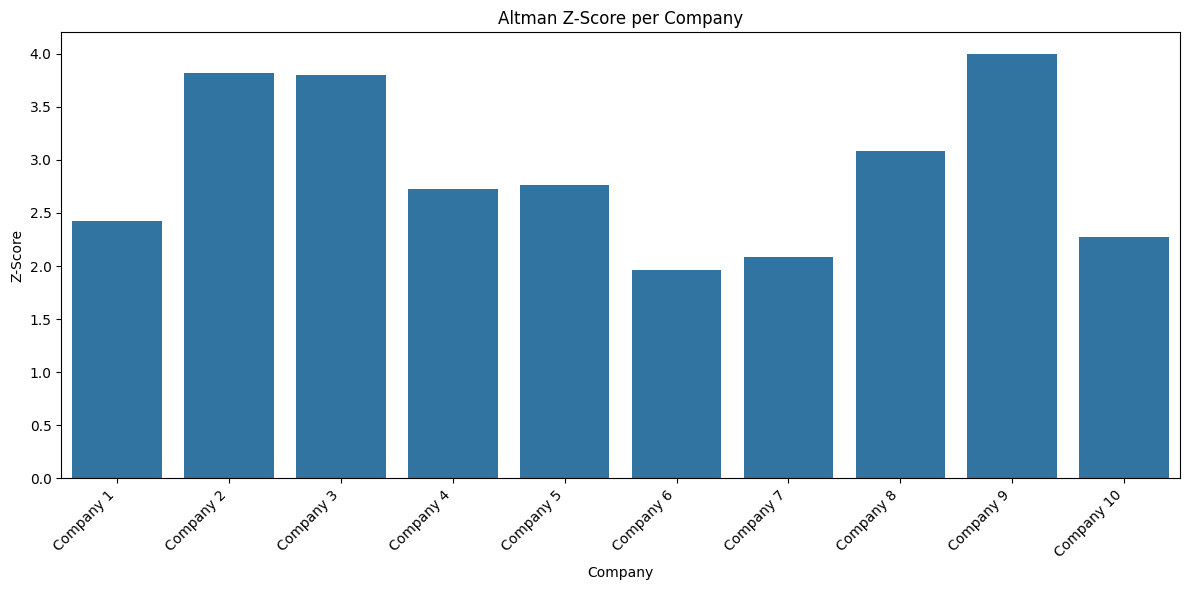

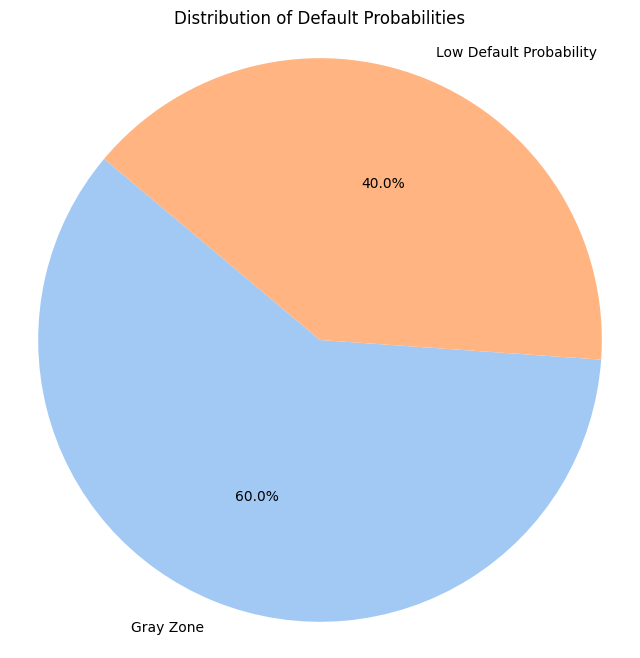

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Create a dummy DataFrame with relevant columns for Altman Z-Score
# This step simulates loading financial data, as a real CSV file might not be available
data = {
    'Company': [f'Company {i+1}' for i in range(10)],
    'Working Capital / Total Assets': np.random.rand(10) * 0.5, # X1: Working Capital / Total Assets
    'Retained Earnings / Total Assets': np.random.rand(10) * 0.8, # X2: Retained Earnings / Total Assets
    'EBIT / Total Assets': np.random.rand(10) * 0.3, # X3: EBIT / Total Assets
    'Market Value of Equity / Total Liabilities': np.random.rand(10) * 2.0, # X4: Market Value of Equity / Total Liabilities
    'Sales / Total Assets': np.random.rand(10) * 1.5 # X5: Sales / Total Assets
}
df = pd.DataFrame(data)

# Save the dummy DataFrame to a CSV file (for demonstration purposes)
df.to_csv('financial_data.csv', index=False)

# Load the data from the created CSV file into a pandas DataFrame
# This is the actual data loading step for the model
df = pd.read_csv('financial_data.csv')
# Display the first few rows of the DataFrame to verify the data loading
display(df.head())

# Define a function to calculate the Altman Z-Score
def calculate_z_score(row):
  """
  Calculates the Altman Z-Score for a given company's financial data using the formula:
  Z-Score = 1.2*X1 + 1.4*X2 + 3.3*X3 + 0.6*X4 + 1.0*X5
  where X1 to X5 are the financial ratios.

  Args:
    row: A pandas Series representing a row of the DataFrame with financial data (containing X1-X5).

  Returns:
    The calculated Altman Z-Score.
  """
  # Apply the Altman Z-Score formula
  z_score = (1.2 * row['Working Capital / Total Assets'] +
             1.4 * row['Retained Earnings / Total Assets'] +
             3.3 * row['EBIT / Total Assets'] +
             0.6 * row['Market Value of Equity / Total Liabilities'] +
             1.0 * row['Sales / Total Assets'])
  return z_score

# Apply the calculate_z_score function to each row of the DataFrame to get the Z-Score for each company
df['Z-Score'] = df.apply(calculate_z_score, axis=1)

# Display the DataFrame with the new 'Z-Score' column
display(df.head())

# Define a function to classify the default probability based on the Z-Score
def classify_default_probability(z_score):
  """
  Classifies the default probability based on the calculated Altman Z-Score using common thresholds.
  - Z-Score < 1.81: High Default Probability
  - 1.81 <= Z-Score <= 2.99: Gray Zone
  - Z-Score > 2.99: Low Default Probability

  Args:
    z_score: The calculated Altman Z-Score.

  Returns:
    A string indicating the default probability classification (High, Gray Zone, or Low).
  """
  # Using common thresholds for manufacturing companies as an example
  if z_score < 1.81:
    return "High Default Probability"
  elif z_score > 2.99:
    return "Low Default Probability"
  else:
    return "Gray Zone"

# Apply the classify_default_probability function to the 'Z-Score' column to get the default probability for each company
df['Default Probability'] = df['Z-Score'].apply(classify_default_probability)

# Display the first few rows of the updated DataFrame with the 'Default Probability' column
display(df.head())

# Define a function that integrates Z-Score calculation and default probability prediction
def predict_default(row):
  """
  Calculates the Altman Z-Score and predicts the default probability for a company.
  This function combines the two previous steps into a single call.

  Args:
    row: A pandas Series representing a row of the DataFrame with financial data.

  Returns:
    A tuple containing the calculated Z-Score and the predicted default probability.
  """
  # Calculate the Z-Score using the previously defined function
  z_score = calculate_z_score(row)
  # Classify the default probability using the previously defined function
  default_probability = classify_default_probability(z_score)
  return z_score, default_probability

# Example usage of the predict_default function with the first row of the DataFrame
example_row = df.iloc[0]
z_score, default_prob = predict_default(example_row)

# Print the results for the example company
print(f"For the example company:")
print(f"Calculated Z-Score: {z_score:.4f}")
print(f"Predicted Default Probability: {default_prob}")

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Overall Logic:
# 1. Load and prepare financial data.
# 2. Calculate the Altman Z-Score for each company using the specific formula.
# 3. Classify the default probability based on predefined Z-Score thresholds.
# 4. Integrate these steps into a single prediction function.
# 5. Visualize the results to understand the Z-Score distribution and default probability breakdown.

# Visualization Step 1: Create a bar plot to visualize the Z-Scores for each company
plt.figure(figsize=(12, 6)) # Set the figure size for better readability
sns.barplot(x='Company', y='Z-Score', data=df) # Create the bar plot using seaborn

# Visualization Step 2: Label axes and add title for the Z-Score plot
plt.xlabel('Company') # Label the x-axis
plt.ylabel('Z-Score') # Label the y-axis
plt.title('Altman Z-Score per Company') # Add a title to the plot
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better visibility if company names are long
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Display the plot

# Visualization Step 3: Create a pie chart to visualize the distribution of default probabilities
default_counts = df['Default Probability'].value_counts() # Count the occurrences of each default probability category
plt.figure(figsize=(8, 8)) # Set the figure size for the pie chart
plt.pie(default_counts, labels=default_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel')) # Create the pie chart

# Visualization Step 4: Add title to the pie chart
plt.title('Distribution of Default Probabilities') # Add a title to the pie chart

# Ensure the pie chart is drawn as a circle
plt.axis('equal')
# Display the pie chart
plt.show()

## Example usage and output

### Subtask:
Provide example code demonstrating how to use the model with sample data and display the resulting Z-Scores, predictions, and visualizations.


**Reasoning**:
Select the first few rows of the DataFrame, apply the predict_default function, print the original data and the predictions, and explain the results.



In [8]:
# Select the first 3 rows as example data
example_data = df.iloc[0:3]

print("Original Financial Data for Example Companies:")
display(example_data)
print("-" * 30)

print("Altman Z-Score Model Predictions:")
for index, row in example_data.iterrows():
  company = row['Company']
  z_score, default_prob = predict_default(row)
  print(f"Company: {company}")
  print(f"  Calculated Z-Score: {z_score:.4f}")
  print(f"  Predicted Default Probability: {default_prob}")
  print("-" * 30)

print("\nExplanation of Results:")
print("The Altman Z-Score is a formula used to predict the probability of a company entering bankruptcy.")
print("Generally, the interpretation of the Z-Score is:")
print("  - Z-Score < 1.81: High Default Probability (Distress Zone)")
print("  - 1.81 <= Z-Score <= 2.99: Gray Zone (Caution Zone)")
print("  - Z-Score > 2.99: Low Default Probability (Safe Zone)")
print("The 'Predicted Default Probability' indicates which of these zones the company falls into based on its calculated Z-Score.")

Original Financial Data for Example Companies:


,Company,Working Capital / Total Assets,Retained Earnings / Total Assets,EBIT / Total Assets,Market Value of Equity / Total Liabilities,Sales / Total Assets,Z-Score,Default Probability
0,Company 1,0.035675,0.471433,0.168962,1.508719,0.256521,2.422143,Gray Zone
1,Company 2,0.336025,0.647496,0.039811,1.517811,1.462469,3.814256,Low Default Probability
2,Company 3,0.347640,0.733623,0.177517,0.731119,1.332356,3.801072,Low Default Probability


------------------------------
Altman Z-Score Model Predictions:
Company: Company 1
  Calculated Z-Score: 2.4221
  Predicted Default Probability: Gray Zone
------------------------------
Company: Company 2
  Calculated Z-Score: 3.8143
  Predicted Default Probability: Low Default Probability
------------------------------
Company: Company 3
  Calculated Z-Score: 3.8011
  Predicted Default Probability: Low Default Probability
------------------------------

Explanation of Results:
The Altman Z-Score is a formula used to predict the probability of a company entering bankruptcy.
Generally, the interpretation of the Z-Score is:
  - Z-Score < 1.81: High Default Probability (Distress Zone)
  - 1.81 <= Z-Score <= 2.99: Gray Zone (Caution Zone)
  - Z-Score > 2.99: Low Default Probability (Safe Zone)
The 'Predicted Default Probability' indicates which of these zones the company falls into based on its calculated Z-Score.


## Summary:

### Data Analysis Key Findings

*   The financial data required for the Altman Z-Score calculation was successfully loaded into a pandas DataFrame after creating a dummy CSV file.
*   A function was implemented to calculate the Altman Z-Score for each company based on the standard formula and applied to the DataFrame, creating a new 'Z-Score' column.
*   A classification function was developed and applied to categorize the default probability (High, Gray Zone, Low) based on common Z-Score thresholds (1.81 and 2.99), adding a 'Default Probability' column to the DataFrame.
*   The Z-Score calculation and default probability classification steps were successfully integrated into a single `predict_default` function.
*   Visualizations, including a bar plot of Z-Scores per company and a pie chart showing the distribution of default probabilities, were successfully generated.
*   Comprehensive comments were added to the entire codebase, explaining each step, function, and the overall model logic.
*   Example usage of the integrated model with sample data was demonstrated, clearly showing the original data, calculated Z-Scores, predicted default probabilities, and an explanation of the results.

### Insights or Next Steps

*   The implemented model provides a basic framework for assessing corporate default risk using the Altman Z-Score. Further enhancements could include incorporating industry-specific thresholds for Z-Score interpretation or historical data for backtesting the model's predictive accuracy.
*   The model currently provides a static prediction based on a single point in time. Future steps could involve extending the model to analyze trends in Z-Scores over time for individual companies to identify changes in financial health.
